<a href="https://colab.research.google.com/github/baut-jc/DDDS-My-Projects/blob/main/Project-4/Project_4_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 4: Spotify

## Problem Definition


State the business problem. Translate the business problem into a Data Science problem by stating what kind of problem it is ( supervised vs unsupervised ) and whether it is a classification, regression, or clustering problem.

**Business Problem:** A record label or artist wants to forecast the potential popularity of a new song *before* its release to make informed marketing and strategic decisions.

**Data Science Problem:** This is a **supervised regression** task.

* It's **supervised** because we have a dataset
with features and a known target variable (*"Popularity"*).

* It's **regression** because "Popularity" is a continuous numerical value, not a category.

**Primary Goal:** Minimize the Root Mean Squared Error (RMSE) when predicting the "Popularity" score.

**Secondary Goal:** Identify which audio features are most influential in predicting popularity.

## Data Collection/Sources


#### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import pickle

In [2]:
url = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.4-Spotify/Data/Spotify.csv"
!curl -s -I {url}

HTTP/1.1 200 OK
x-amz-id-2: nFXaztQGMo/Yk/HsbEudWoP2wpMKXL4TPOHyzzV19IG3OVtxZpWski86es4GpfqteYt9Q84b5e4=
x-amz-request-id: 4ARJ95CR78S8G5ET
Date: Thu, 03 Jul 2025 00:23:43 GMT
Last-Modified: Wed, 04 Oct 2023 17:23:56 GMT
ETag: "65b9875b11e0d7ea03ee2af024f45e99"
x-amz-server-side-encryption: AES256
Accept-Ranges: bytes
Content-Type: text/csv
Content-Length: 738124
Server: AmazonS3



In [3]:
!curl -s -O {url}

In [4]:
ls -la

total 740
drwxr-xr-x 1 root root   4096 Jul  3 00:12 ./
drwxr-xr-x 1 root root   4096 Jul  3 00:11 ../
drwxr-xr-x 4 root root   4096 Jul  1 21:04 .config/
drwxr-xr-x 1 root root   4096 Jul  1 21:04 sample_data/
-rw-r--r-- 1 root root 738124 Jul  3 00:23 Spotify.csv


In [5]:
!head -1 Spotify.csv | tr , '\n' | cat -n

     1	Index
     2	Highest Charting Position
     3	Number of Times Charted
     4	Week of Highest Charting
     5	Song Name
     6	Streams
     7	Artist
     8	Artist Followers
     9	Song ID
    10	Genre
    11	Release Date
    12	Weeks Charted
    13	Popularity
    14	Danceability
    15	Energy
    16	Loudness
    17	Speechiness
    18	Acousticness
    19	Liveness
    20	Tempo
    21	Duration (ms)
    22	Valence
    23	Chord


#### S.H.I.D

In [6]:
df = pd.read_csv( url )
df.shape

(1556, 23)

In [7]:
df.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [8]:
df.info()

# many objects that may need to be converted into --> ints/float(numeric)
# .drop() --> Song ID,Index,
# Chord may nto be necessary; but what effect might it do with Streams... maybe even Energy and Liveness.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1556 non-null   int64 
 1   Highest Charting Position  1556 non-null   int64 
 2   Number of Times Charted    1556 non-null   int64 
 3   Week of Highest Charting   1556 non-null   object
 4   Song Name                  1556 non-null   object
 5   Streams                    1556 non-null   object
 6   Artist                     1556 non-null   object
 7   Artist Followers           1556 non-null   object
 8   Song ID                    1556 non-null   object
 9   Genre                      1556 non-null   object
 10  Release Date               1556 non-null   object
 11  Weeks Charted              1556 non-null   object
 12  Popularity                 1556 non-null   object
 13  Danceability               1556 non-null   object
 14  Energy  

In [9]:
df.describe().transpose().sort_values( by = ["mean"])

,count,mean,std,min,25%,50%,75%,max
Number of Times Charted,1556.0,10.668380,16.360546,1.0,1.00,4.0,12.00,142.0
Highest Charting Position,1556.0,87.744216,58.147225,1.0,37.00,80.0,137.00,200.0
Index,1556.0,778.500000,449.322824,1.0,389.75,778.5,1167.25,1556.0


## Data Cleaning


In [10]:
df.nunique().sort_values(ascending = False)

# streams/song name could be the target
#will i know this feature that may have affected the target.

,0
Index,1556
Streams,1556
Song Name,1556
Song ID,1517
Duration (ms),1486
Tempo,1461
Loudness,1394
Acousticness,965
Weeks Charted,775
Speechiness,772


In [11]:
df['Streams']

,Streams
0,"48,633,449"
1,"47,248,719"
2,"40,162,559"
3,"37,799,456"
4,"33,948,454"
...,...
1551,"4,630,675"
1552,"4,623,030"
1553,"4,620,876"
1554,"4,607,385"


#### Data Types Conversion

In [12]:
## Columns like 'Streams' and 'Artist Followers' have commas. Remove them and convert to numbers.

df['Streams'] = pd.to_numeric(df['Streams'].str.replace(',', ''))
df['Artist Followers'] = pd.to_numeric(df['Artist Followers'].str.replace(',', ''), errors='coerce')


In [13]:
# Convert all audio feature columns from 'object' to numeric.
# Using errors='coerce' will turn any problematic values into 'NaN' (Not a Number),
# which we can handle next.

audio_features = ['Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
                  'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence']
for col in audio_features:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.sample(7)

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
886,887,150,13,2020-09-11--2020-09-18,21,5151406,Polo G,4849204.0,3JKgcAa7r07ocVWcV8bS0H,['chicago rap'],...,0.783,0.479,-10.646,0.5410,0.1490,0.1010,176.027,163798.0,0.533,G
1066,1067,32,16,2020-03-13--2020-03-20,Myron,4593309,Lil Uzi Vert,11821805.0,56uXDJRCuoS7abX3SkzHKQ,"['melodic rap', 'philly rap', 'rap', 'trap']",...,0.771,0.654,-6.976,0.2980,0.0550,0.2140,155.047,224955.0,0.573,G#/Ab
1125,1126,189,5,2020-04-10--2020-04-17,changes,4299334,XXXTENTACION,29566516.0,7AFASza1mXqntmGtbxXprO,"['emo rap', 'miami hip hop']",...,0.669,0.308,-10.068,0.0290,0.8830,0.0984,64.934,121887.0,0.520,B
930,931,111,11,2020-07-03--2020-07-10,Reggaetonera,4564331,Anuel AA,18306226.0,6yVkakCN460KOVol9ZazjH,"['latin', 'reggaeton', 'reggaeton flow', 'trap...",...,0.694,0.796,-4.164,0.0565,0.4800,0.1080,93.064,212312.0,0.515,F#/Gb
1271,1272,35,2,2020-03-20--2020-03-27,Snowchild,5423997,The Weeknd,35340069.0,3WlbeuhfRSqU7ylK2Ui5U7,"['canadian contemporary r&b', 'canadian pop', ...",...,0.550,0.611,-7.475,0.1370,0.1620,0.1210,148.062,247187.0,0.243,C
62,63,9,10,2021-05-21--2021-05-28,brutal,8881356,Olivia Rodrigo,6266514.0,6SRsiMl7w1USE4mFqrOhHC,['pop'],...,0.672,0.526,-6.446,0.0599,0.0311,0.2800,123.999,143747.0,0.280,E
1157,1158,56,3,2020-05-08--2020-05-15,MÁS DE UNA CITA,4987116,"Bad Bunny, Zion & Lennox",36177712.0,4EJHKSnHENfjOxXWryyNtL,"['latin', 'reggaeton', 'trap latino']",...,0.865,0.500,-10.805,0.0861,0.0122,0.0980,92.976,183520.0,0.317,F


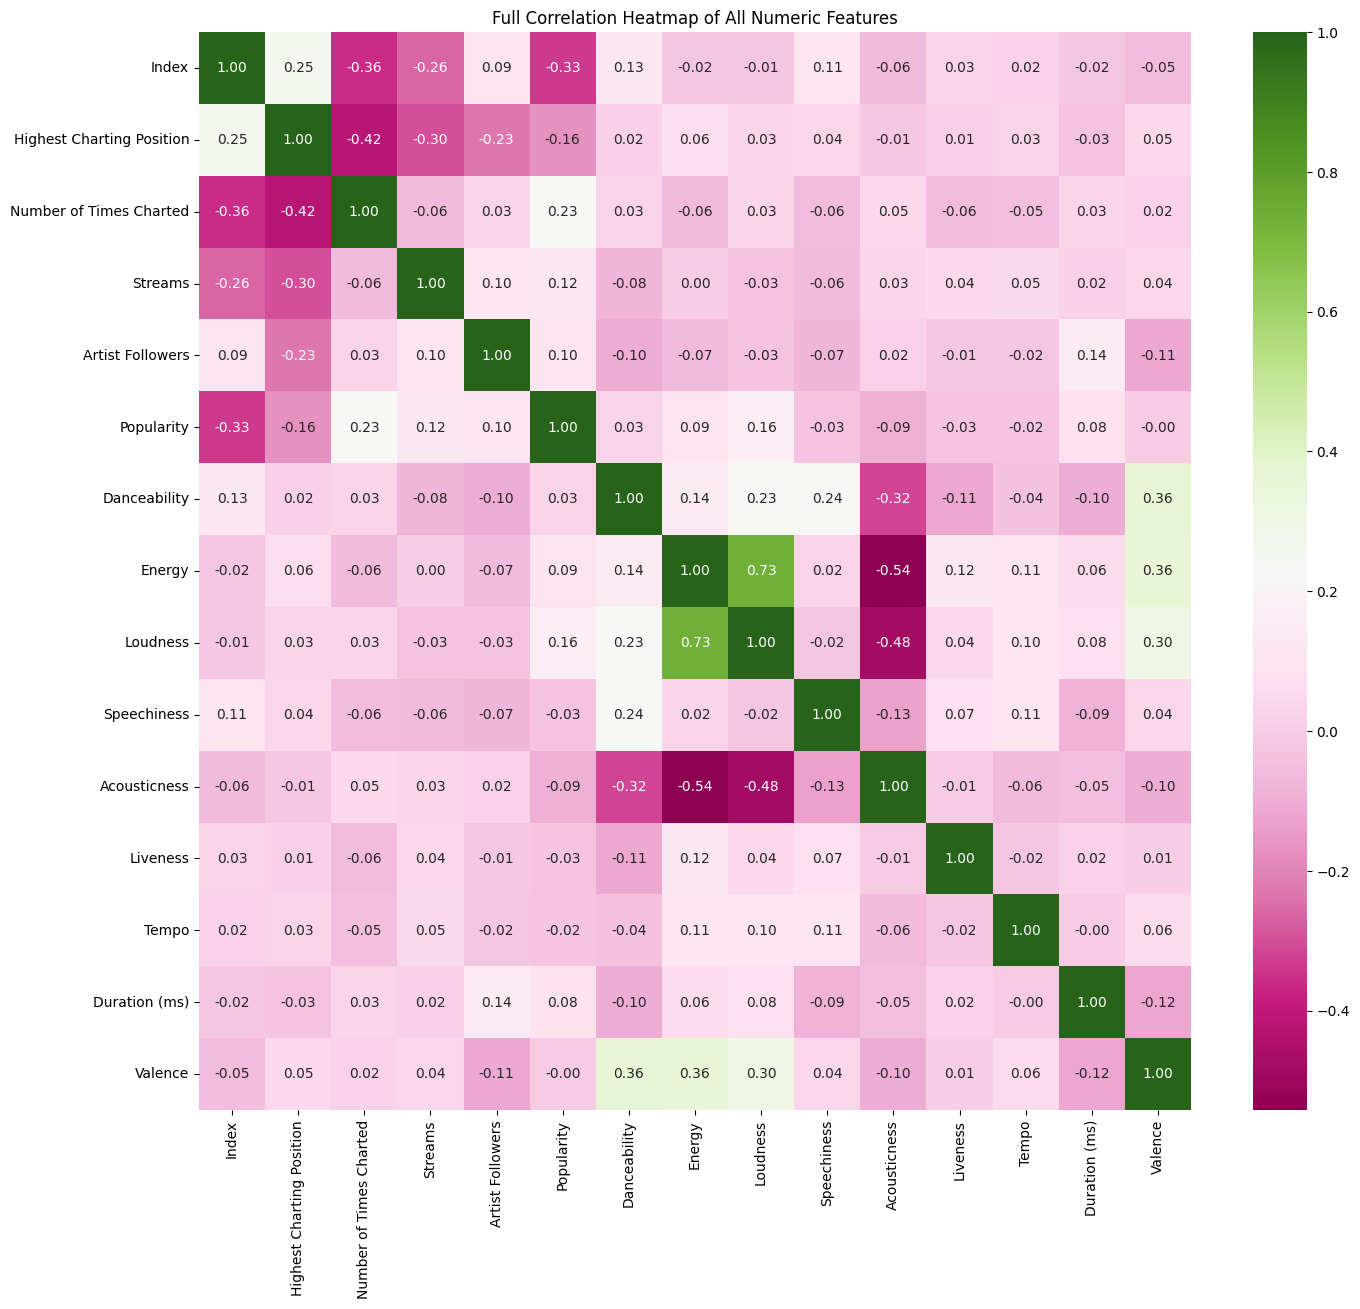

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=np.number)

# Create the correlation matrix
corr_matrix = numeric_df.corr()

plt.figure(figsize=(16, 14))
sns.heatmap(
    corr_matrix,
    annot=True,      # This adds the numbers to the squares
    fmt='.2f',       # Format numbers to 2 decimal places
    cmap='PiYG'   # Color scheme
)
plt.title('Full Correlation Heatmap of All Numeric Features')
plt.show()

#### Remove NULLS

In [15]:
df_clean = df.copy()
df_clean.isnull().sum()

,0
Index,0
Highest Charting Position,0
Number of Times Charted,0
Week of Highest Charting,0
Song Name,0
Streams,0
Artist,0
Artist Followers,11
Song ID,0
Genre,0


In [16]:
# missing numbers avg with mean.
for col in df_clean.columns:
    if df_clean[col].dtype == 'float64' or df_clean[col].dtype == 'int64':
        df_clean[col].fillna(df_clean[col].median(), inplace=True)

df_clean.isnull().sum().sum()

/tmp/ipython-input-16-36251108.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].median(), inplace=True)


np.int64(0)

#### Convert Dates for features

In [18]:
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')
df['Release Date']

,Release Date
0,2017-12-08
1,2021-07-09
2,2021-05-21
3,2021-06-25
4,2021-07-23
...,...
1551,2017-06-02
1552,2019-10-11
1553,2018-01-12
1554,2019-09-25


In [21]:
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')
df['Release_Year'] = df['Release Date'].dt.year
df['Release_Month'] = df['Release Date'].dt.month

df[['Release Date', 'Release_Year', 'Release_Month']]

,Release Date,Release_Year,Release_Month
0,2017-12-08,2017.0,12.0
1,2021-07-09,2021.0,7.0
2,2021-05-21,2021.0,5.0
3,2021-06-25,2021.0,6.0
4,2021-07-23,2021.0,7.0
...,...,...,...
1551,2017-06-02,2017.0,6.0
1552,2019-10-11,2019.0,10.0
1553,2018-01-12,2018.0,1.0
1554,2019-09-25,2019.0,9.0


####Feature Selection

In [22]:
target = 'Popularity'
features_to_drop = [
    'Index', 'Highest Charting Position', 'Number of Times Charted',
    'Week of Highest Charting', 'Song Name', 'Streams', 'Song ID',
    'Artist', 'Genre', 'Release Date', 'Weeks Charted', 'Chord'
]

predictors = df.drop(columns=[target] + features_to_drop)

predictors

,Artist Followers,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Release_Year,Release_Month
0,3377762.0,0.714,0.800,-4.808,0.0504,0.12700,0.3590,134.002,211560.0,0.589,2017.0,12.0
1,2230022.0,0.591,0.764,-5.484,0.0483,0.03830,0.1030,169.928,141806.0,0.478,2021.0,7.0
2,6266514.0,0.563,0.664,-5.044,0.1540,0.33500,0.0849,166.928,178147.0,0.688,2021.0,5.0
3,83293380.0,0.808,0.897,-3.712,0.0348,0.04690,0.3640,126.026,231041.0,0.591,2021.0,6.0
4,5473565.0,0.736,0.704,-7.409,0.0615,0.02030,0.0501,149.995,212000.0,0.894,2021.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1551,27167675.0,0.762,0.700,-6.021,0.0694,0.00261,0.1530,116.073,209320.0,0.608,2017.0,6.0
1552,15019109.0,0.528,0.870,-3.123,0.0851,0.24000,0.3330,152.370,181930.0,0.714,2019.0,10.0
1553,22698747.0,0.765,0.523,-4.333,0.0300,0.18400,0.1320,104.988,217307.0,0.394,2018.0,1.0
1554,208630.0,0.832,0.550,-7.026,0.0587,0.24900,0.1820,154.064,152784.0,0.881,2019.0,9.0


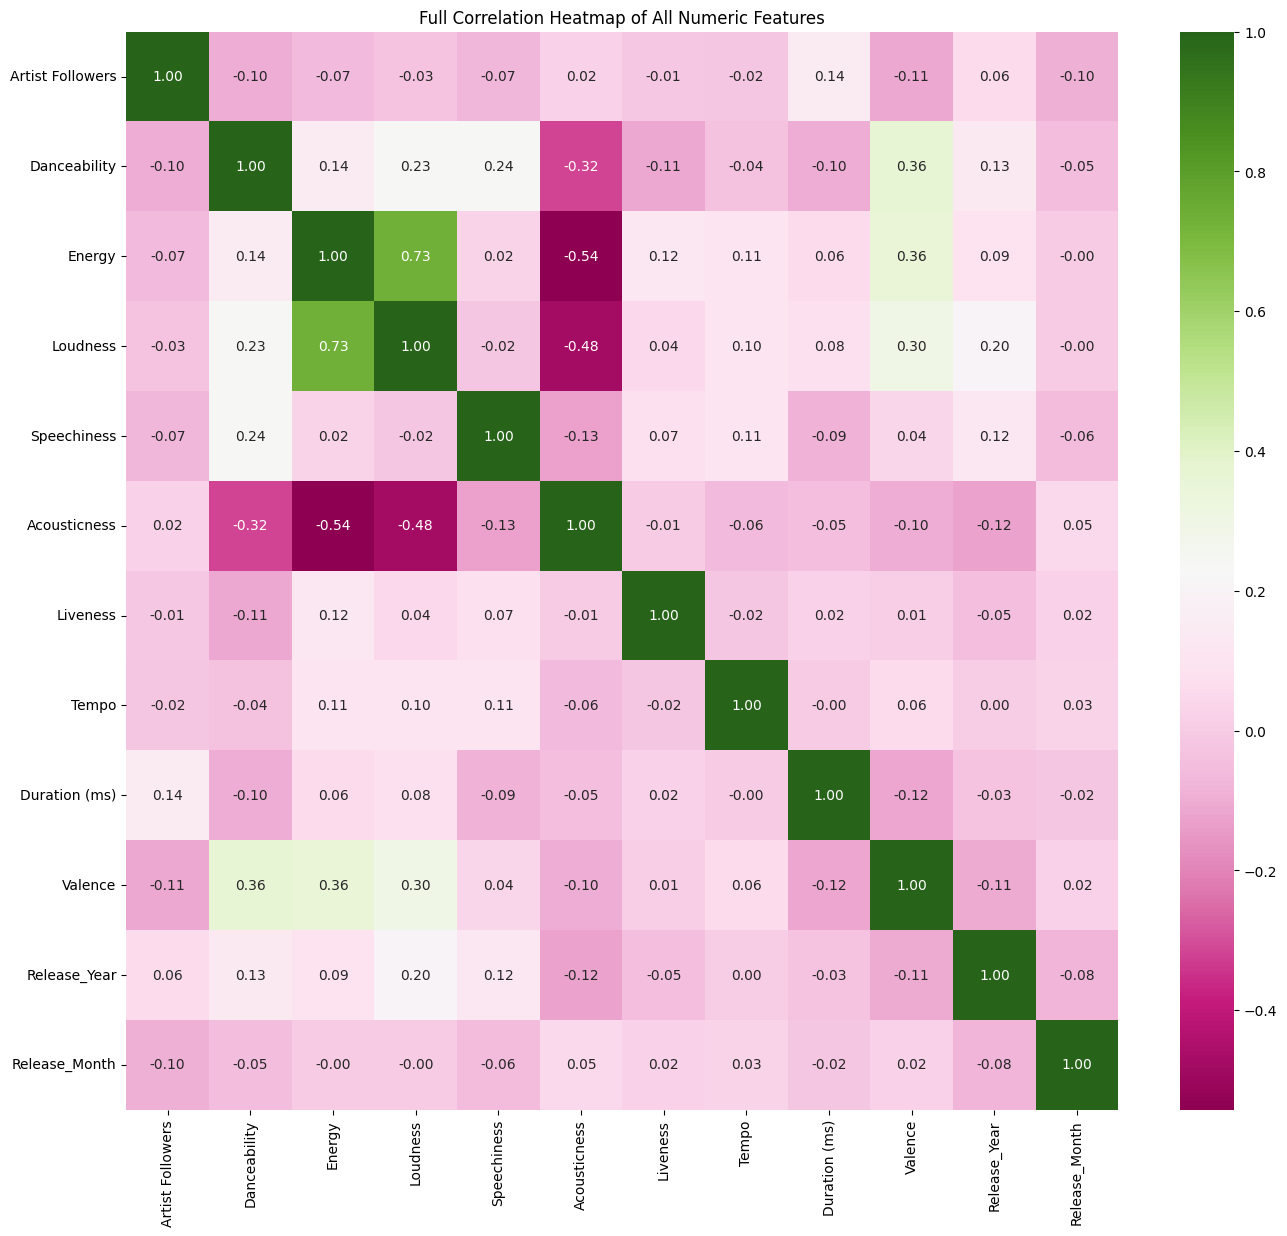

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select only numeric columns for the correlation matrix
# num_df = df.select_dtypes(include=np.number)

# Create the correlation matrix
corr_matrix = predictors.corr()

plt.figure(figsize=(16, 14))
sns.heatmap(
    corr_matrix,
    annot=True,      # This adds the numbers to the squares
    fmt='.2f',       # Format numbers to 2 decimal places
    cmap='PiYG'   # Color scheme
)
plt.title('Full Correlation Heatmap of All Numeric Features')
plt.show()

## Exploratory Data Analysis


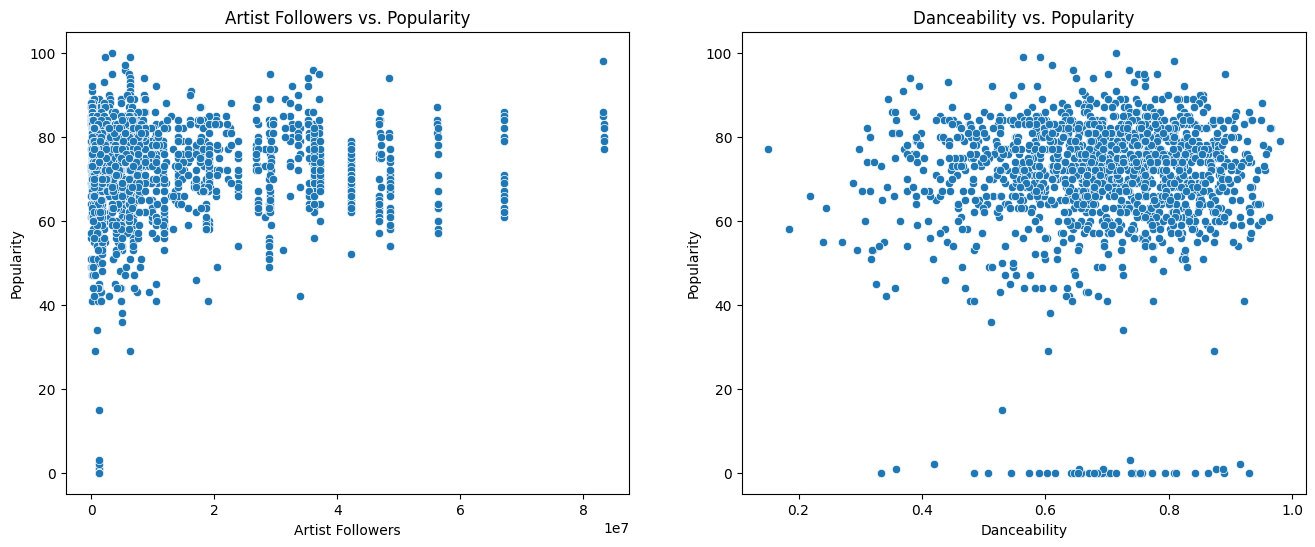

In [26]:
# Let's assume the heatmap showed 'Artist Followers' and 'Danceability' are correlated with 'Popularity'
plt.figure(figsize=(16, 6))

# Plot Artist Followers vs. Popularity
plt.subplot(1, 2, 1)
sns.scatterplot(x=df_clean['Artist Followers'], y=df_clean['Popularity'])
plt.title('Artist Followers vs. Popularity')

# Plot Danceability vs. Popularity
plt.subplot(1, 2, 2)
sns.scatterplot(x=df_clean['Danceability'], y=df_clean['Popularity'])
plt.title('Danceability vs. Popularity')

plt.show()

In [17]:
# corr plot to different target to compare what features may be affective to distinguish and compare features

## Processing



In [28]:
X = predictors.select_dtypes(include=np.number)
y = df[target]

In [29]:
numLoops = 500

rms_error = np.zeros(numLoops)

for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
  model = DecisionTreeRegressor(max_depth=3)         # Arbitrarily choosing max_depth of 3
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"CV RMSE: {rms_error.mean().round(2)*1000}")


ValueError: Input y contains NaN.

## Data Visualization/Communication of Results
